In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/tenzin/ML/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 263s 59us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore data

In [7]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [8]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

## Preprocess the data

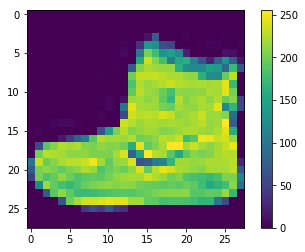

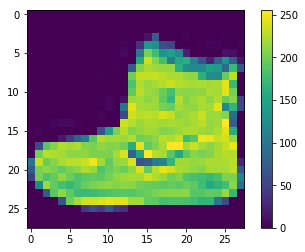

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

- It's important that the training set and the testing set are preprocessed in the same way

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

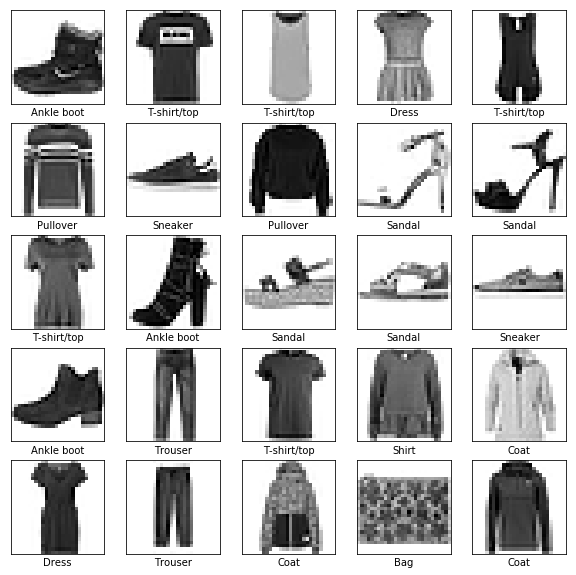

In [18]:
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model
- Overfitting and Underfitting
    - The simplest way to prevent overfitting is to reduce the size of the model

#### Baseline Model

In [45]:
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [55]:
baseline_model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [56]:
baseline_history = baseline_model.fit(train_images, 
                                      train_labels, 
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.2538 - acc: 0.9085 - sparse_categorical_crossentropy: 0.2538 - val_loss: 0.3563 - val_acc: 0.8700 - val_sparse_categorical_crossentropy: 0.3563
Epoch 2/20
 - 2s - loss: 0.2475 - acc: 0.9111 - sparse_categorical_crossentropy: 0.2475 - val_loss: 0.3382 - val_acc: 0.8791 - val_sparse_categorical_crossentropy: 0.3382
Epoch 3/20
 - 2s - loss: 0.2408 - acc: 0.9128 - sparse_categorical_crossentropy: 0.2408 - val_loss: 0.3396 - val_acc: 0.8798 - val_sparse_categorical_crossentropy: 0.3396
Epoch 4/20
 - 2s - loss: 0.2378 - acc: 0.9142 - sparse_categorical_crossentropy: 0.2378 - val_loss: 0.3651 - val_acc: 0.8706 - val_sparse_categorical_crossentropy: 0.3651
Epoch 5/20
 - 1s - loss: 0.2382 - acc: 0.9134 - sparse_categorical_crossentropy: 0.2382 - val_loss: 0.3442 - val_acc: 0.8786 - val_sparse_categorical_crossentropy: 0.3442
Epoch 6/20
 - 2s - loss: 0.2321 - acc: 0.9163 - sparse_categorical_crossentropy: 0.2321 - val_l

#### Smaller model

In [83]:
smaller_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [84]:
smaller_model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [85]:
smaller_history = smaller_model.fit(train_images, 
                                      train_labels, 
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 2.0299 - acc: 0.2601 - sparse_categorical_crossentropy: 2.0299 - val_loss: 1.8425 - val_acc: 0.3310 - val_sparse_categorical_crossentropy: 1.8425
Epoch 2/20
 - 1s - loss: 1.6604 - acc: 0.3838 - sparse_categorical_crossentropy: 1.6604 - val_loss: 1.4945 - val_acc: 0.4588 - val_sparse_categorical_crossentropy: 1.4945
Epoch 3/20
 - 1s - loss: 1.3258 - acc: 0.5722 - sparse_categorical_crossentropy: 1.3258 - val_loss: 1.2094 - val_acc: 0.6224 - val_sparse_categorical_crossentropy: 1.2094
Epoch 4/20
 - 1s - loss: 1.1219 - acc: 0.6556 - sparse_categorical_crossentropy: 1.1219 - val_loss: 1.0750 - val_acc: 0.6701 - val_sparse_categorical_crossentropy: 1.0750
Epoch 5/20
 - 1s - loss: 1.0125 - acc: 0.7034 - sparse_categorical_crossentropy: 1.0125 - val_loss: 0.9859 - val_acc: 0.7001 - val_sparse_categorical_crossentropy: 0.9859
Epoch 6/20
 - 1s - loss: 0.9335 - acc: 0.7276 - sparse_categorical_crossentropy: 0.9335 - val_l

#### Bigger model

In [73]:
bigger_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [74]:
bigger_model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_30 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [75]:
bigger_history = bigger_model.fit(train_images, 
                                      train_labels, 
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 17s - loss: 0.5271 - acc: 0.8135 - sparse_categorical_crossentropy: 0.5271 - val_loss: 0.4004 - val_acc: 0.8585 - val_sparse_categorical_crossentropy: 0.4004
Epoch 2/20
 - 15s - loss: 0.3566 - acc: 0.8715 - sparse_categorical_crossentropy: 0.3566 - val_loss: 0.3862 - val_acc: 0.8612 - val_sparse_categorical_crossentropy: 0.3862
Epoch 3/20
 - 15s - loss: 0.3201 - acc: 0.8826 - sparse_categorical_crossentropy: 0.3201 - val_loss: 0.3792 - val_acc: 0.8640 - val_sparse_categorical_crossentropy: 0.3792
Epoch 4/20
 - 14s - loss: 0.2888 - acc: 0.8924 - sparse_categorical_crossentropy: 0.2888 - val_loss: 0.3669 - val_acc: 0.8626 - val_sparse_categorical_crossentropy: 0.3669
Epoch 5/20
 - 15s - loss: 0.2731 - acc: 0.8989 - sparse_categorical_crossentropy: 0.2731 - val_loss: 0.3432 - val_acc: 0.8743 - val_sparse_categorical_crossentropy: 0.3432
Epoch 6/20
 - 14s - loss: 0.2562 - acc: 0.9057 - sparse_categorical_crossentropy: 0.2562 -

## Plot the training and validation loss

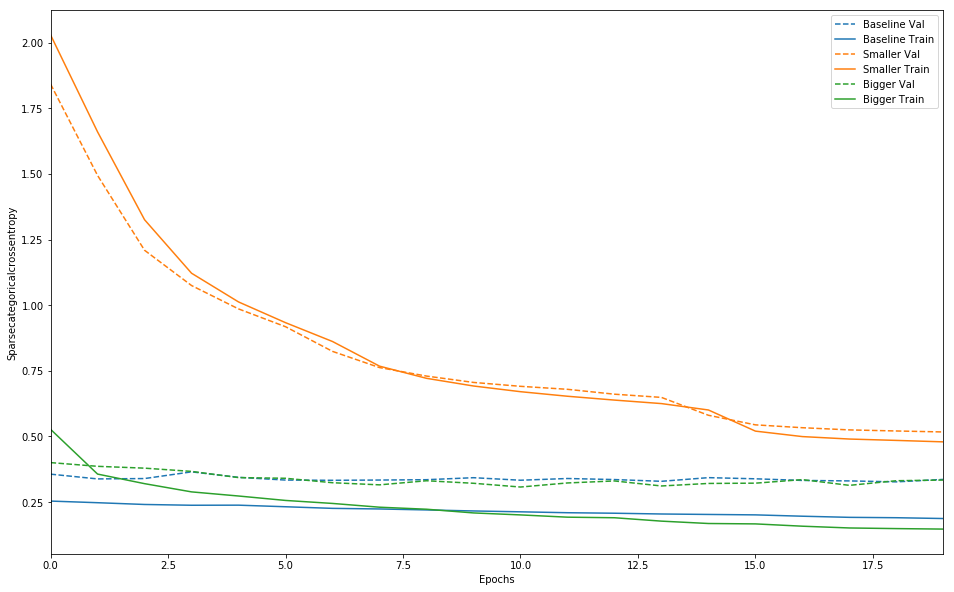

In [86]:
def plot_history(histories, key='sparse_categorical_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', '').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])

        
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Strategies

### 1. Weight Regularization
- Common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular"
- A "simple model" in this context is a model where the distribution of parameter values has less entropy
- It is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
    - **L1** regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
    - **L2** regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks

#### L2 weight regularization

In [94]:
l2_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1000, kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1000, kernel_regularizer=keras.regularizers.l2(0.01), activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

In [95]:
l2_model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])
l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_41 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_42 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [96]:
l2_history = l2_model.fit(train_images, 
                                      train_labels, 
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 17s - loss: 4.5898 - acc: 0.7573 - sparse_categorical_crossentropy: 0.7102 - val_loss: 1.2405 - val_acc: 0.7800 - val_sparse_categorical_crossentropy: 0.6459
Epoch 2/20
 - 17s - loss: 0.9415 - acc: 0.8111 - sparse_categorical_crossentropy: 0.5583 - val_loss: 0.8357 - val_acc: 0.7930 - val_sparse_categorical_crossentropy: 0.5728
Epoch 3/20
 - 17s - loss: 0.7649 - acc: 0.8157 - sparse_categorical_crossentropy: 0.5343 - val_loss: 0.7800 - val_acc: 0.7912 - val_sparse_categorical_crossentropy: 0.5773
Epoch 4/20
 - 16s - loss: 0.7109 - acc: 0.8204 - sparse_categorical_crossentropy: 0.5161 - val_loss: 0.7355 - val_acc: 0.8069 - val_sparse_categorical_crossentropy: 0.5517
Epoch 5/20
 - 16s - loss: 0.6785 - acc: 0.8266 - sparse_categorical_crossentropy: 0.4976 - val_loss: 0.6986 - val_acc: 0.8103 - val_sparse_categorical_crossentropy: 0.5270
Epoch 6/20
 - 16s - loss: 0.6588 - acc: 0.8280 - sparse_categorical_crossentropy: 0.4877 -

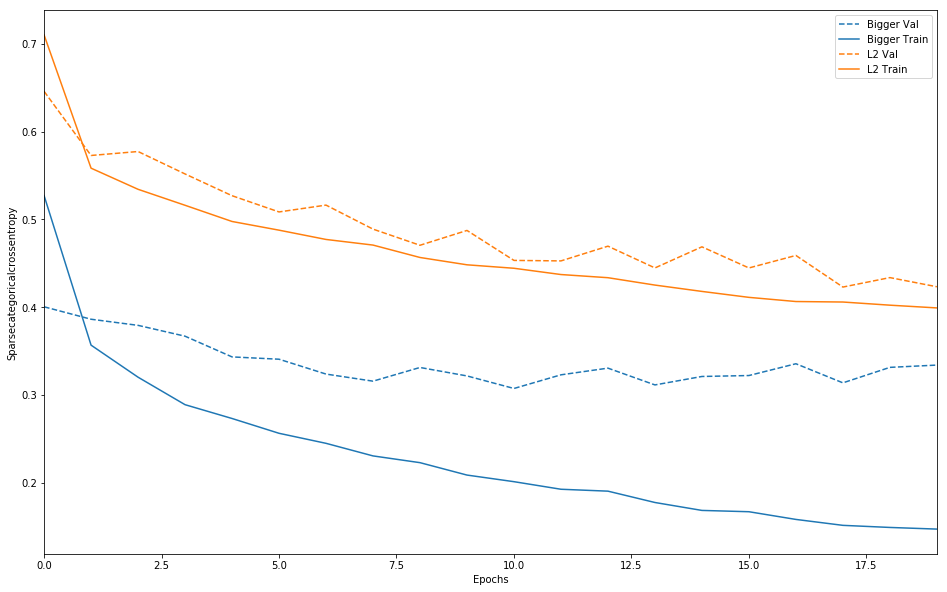

In [97]:
plot_history([('bigger', bigger_history),
              ('l2', l2_history)])

### 2. Dropout

In [99]:
dpt_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])


dpt_history = dpt_model.fit(train_images, 
                                      train_labels, 
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 19s - loss: 0.6802 - acc: 0.7560 - sparse_categorical_crossentropy: 0.6802 - val_loss: 0.4723 - val_acc: 0.8284 - val_sparse_categorical_crossentropy: 0.4723
Epoch 2/20
 - 17s - loss: 0.4459 - acc: 0.8388 - sparse_categorical_crossentropy: 0.4459 - val_loss: 0.4315 - val_acc: 0.8419 - val_sparse_categorical_crossentropy: 0.4315
Epoch 3/20
 - 17s - loss: 0.4035 - acc: 0.8536 - sparse_categorical_crossentropy: 0.4035 - val_loss: 0.3781 - val_acc: 0.8639 - val_sparse_categorical_crossentropy: 0.3781
Epoch 4/20
 - 17s - loss: 0.3816 - acc: 0.8617 - sparse_categorical_crossentropy: 0.3816 - val_loss: 0.3729 - val_acc: 0.8639 - val_sparse_categorical_crossentropy: 0.3729
Epoch 5/20
 - 18s - loss: 0.3680 - acc: 0.8661 - sparse_categorical_crossentropy: 0.3680 - val_loss: 0.3775 - val_acc: 0.8646 - val_sparse_categorical_crossentropy: 0.3775
Epoch 6/20
 - 16s - loss: 0.3582 - acc: 0.8685 - sparse_categorical_crossentropy: 0.3582 -

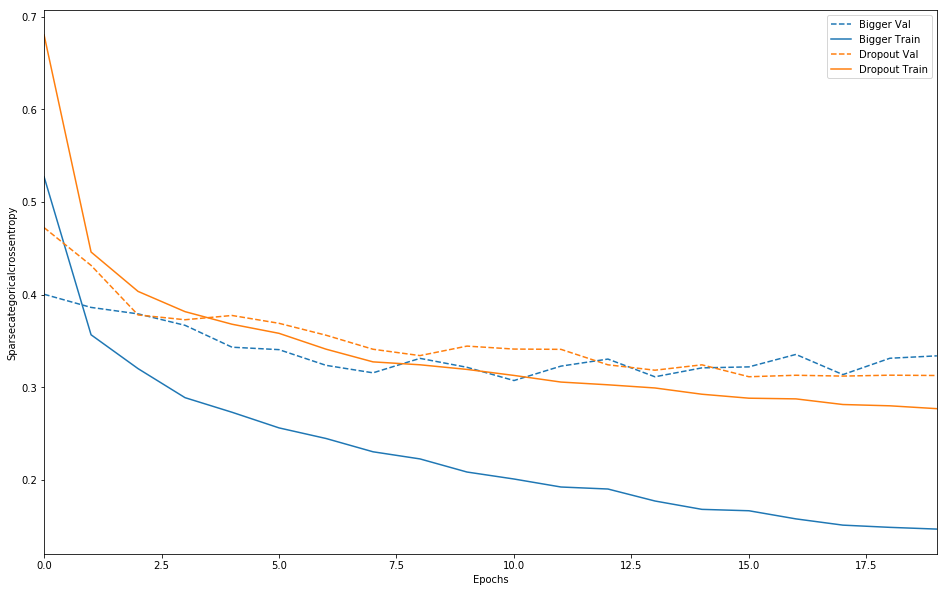

In [100]:
plot_history([('bigger', bigger_history),
              ('dropout', dpt_history)])

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8685


In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([8.7489334e-06, 4.6715317e-07, 1.0455550e-06, 2.8094867e-06,
       2.3290527e-06, 2.8135773e-02, 7.3521451e-06, 1.0507571e-01,
       2.4565719e-05, 8.6674118e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0], class_names[np.argmax(predictions[0])]

(9, 'Ankle boot')

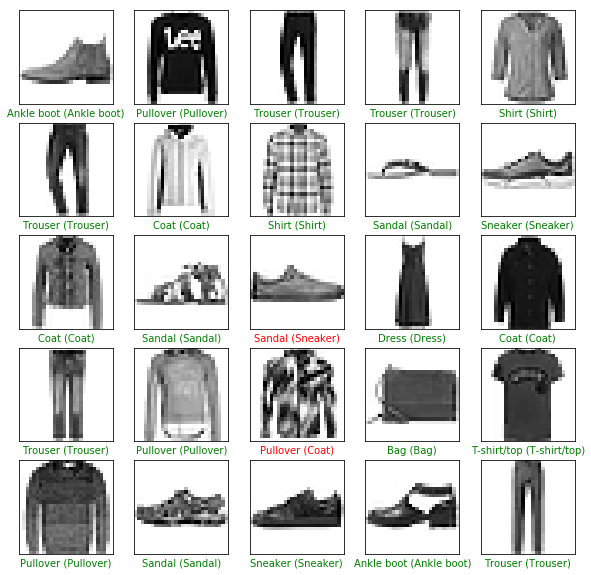

In [29]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'    
    plt.xlabel('{} ({})'.format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

### Finally, use the trained model to make a prediction about a single image.

In [30]:
# Grab an image from the test dataset
img = test_images[0]
img.shape

(28, 28)

- **tf.keras** models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [32]:
predictions = model.predict(img)
predictions

array([[8.7489416e-06, 4.6715496e-07, 1.0455531e-06, 2.8094919e-06,
        2.3290527e-06, 2.8135734e-02, 7.3521451e-06, 1.0507571e-01,
        2.4565721e-05, 8.6674118e-01]], dtype=float32)

In [33]:
predictioin = predictions[0]
np.argmax(predictions)

9